In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# chargement des données

In [3]:

try:
    data = pd.read_excel("online_retail.xlsx")
except FileNotFoundError:
    print("Erreur: fichier 'online_retail.xlsx' introuvable")
except Exception as e:
    print(f"Erreur lors du chargement: {e}")


In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
data.shape

(525461, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


# ÉTAPE 1 : AUDIT QUALITÉ ET NETTOYAGE PRÉLIMINAIRE

## 1.1 Dictionnaire des variables & Types

Vérifions d'abord la structure des données et les types de chaque colonne.

In [7]:
# Affichage des informations générales
print("=" * 70)
print("INFORMATIONS GÉNÉRALES DU DATASET")
print("=" * 70)
print(f"\nNombre de lignes : {data.shape[0]:,}")
print(f"Nombre de colonnes : {data.shape[1]}")
print(f"\nPériode couverte : {data['InvoiceDate'].min()} à {data['InvoiceDate'].max()}")

print("\n" + "=" * 70)
print("TYPES DE DONNÉES")
print("=" * 70)
print(data.dtypes)

print("\n" + "=" * 70)
print("APERÇU DES PREMIÈRES LIGNES")
print("=" * 70)
data.head(10)

INFORMATIONS GÉNÉRALES DU DATASET

Nombre de lignes : 525,461
Nombre de colonnes : 8

Période couverte : 2009-12-01 07:45:00 à 2010-12-09 20:01:00

TYPES DE DONNÉES
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

APERÇU DES PREMIÈRES LIGNES


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


### 🔍 Analyse des types de données

**Observations attendues :**
- `InvoiceDate` devrait être en datetime64
- `Customer ID` est probablement en float64 (avec des .0) à cause des valeurs manquantes
- Les autres colonnes numériques (Quantity, Price) devraient être en int64/float64

**Actions requises :**
- Convertir `Customer ID` en format approprié après gestion des NaN
- Vérifier que `InvoiceDate` est bien en datetime

## 1.2 Valeurs manquantes

Identification complète des données manquantes par colonne.

In [8]:
# Analyse des valeurs manquantes
print("=" * 70)
print("VALEURS MANQUANTES PAR COLONNE")
print("=" * 70)

missing_data = pd.DataFrame({
    'Colonnes': data.columns,
    'Nombre_NaN': data.isnull().sum(),
    'Pourcentage': (data.isnull().sum() / len(data) * 100).round(2)
})

missing_data = missing_data[missing_data['Nombre_NaN'] > 0].sort_values(
    'Pourcentage', ascending=False
)

if len(missing_data) > 0:
    print(missing_data.to_string(index=False))
else:
    print("✅ Aucune valeur manquante détectée !")

print("\n" + "=" * 70)
print("DÉTAIL CUSTOMER ID")
print("=" * 70)
print(f"Transactions SANS Customer ID : {data['Customer ID'].isnull().sum():,} ({(data['Customer ID'].isnull().sum() / len(data) * 100):.2f}%)")
print(f"Transactions AVEC Customer ID : {data['Customer ID'].notna().sum():,} ({(data['Customer ID'].notna().sum() / len(data) * 100):.2f}%)")

VALEURS MANQUANTES PAR COLONNE
   Colonnes  Nombre_NaN  Pourcentage
Customer ID      107927        20.54
Description        2928         0.56

DÉTAIL CUSTOMER ID
Transactions SANS Customer ID : 107,927 (20.54%)
Transactions AVEC Customer ID : 417,534 (79.46%)
   Colonnes  Nombre_NaN  Pourcentage
Customer ID      107927        20.54
Description        2928         0.56

DÉTAIL CUSTOMER ID
Transactions SANS Customer ID : 107,927 (20.54%)
Transactions AVEC Customer ID : 417,534 (79.46%)


### 📊 Stratégie pour les valeurs manquantes

**Customer ID manquant :**
- **Problème critique** : Pour calculer CLV, RFM et les cohortes, nous avons **absolument besoin** du Customer ID
- Les transactions sans ID ne peuvent pas être attribuées à un client → impossible de mesurer la récurrence, la fréquence ou la valeur vie
- **Décision** : Supprimer les lignes sans Customer ID (nécessaire pour l'analyse client)

**Description manquante (si applicable) :**
- Moins critique pour CLV/RFM mais peut affecter l'analyse produit
- À traiter selon le pourcentage

## 1.3 Doublons

Recherche des transactions identiques (doublons complets).

In [9]:
# Détection des doublons
print("=" * 70)
print("ANALYSE DES DOUBLONS")
print("=" * 70)

nb_doublons = data.duplicated().sum()
print(f"\nNombre de lignes dupliquées (complètement identiques) : {nb_doublons:,}")
print(f"Pourcentage : {(nb_doublons / len(data) * 100):.2f}%")

if nb_doublons > 0:
    print("\n📋 Exemple de doublons :")
    print(data[data.duplicated(keep=False)].sort_values(
        ['Invoice', 'StockCode']
    ).head(6))

ANALYSE DES DOUBLONS

Nombre de lignes dupliquées (complètement identiques) : 6,865
Pourcentage : 1.31%

📋 Exemple de doublons :

Nombre de lignes dupliquées (complètement identiques) : 6,865
Pourcentage : 1.31%

📋 Exemple de doublons :
    Invoice StockCode                       Description  Quantity  \
379  489517     21491   SET OF THREE VINTAGE GIFT WRAPS         1   
391  489517     21491   SET OF THREE VINTAGE GIFT WRAPS         1   
365  489517     21821  GLITTER STAR GARLAND WITH BELLS          1   
386  489517     21821  GLITTER STAR GARLAND WITH BELLS          1   
363  489517     21912          VINTAGE SNAKES & LADDERS         1   
371  489517     21912          VINTAGE SNAKES & LADDERS         1   

            InvoiceDate  Price  Customer ID         Country  
379 2009-12-01 11:34:00   1.95      16329.0  United Kingdom  
391 2009-12-01 11:34:00   1.95      16329.0  United Kingdom  
365 2009-12-01 11:34:00   3.75      16329.0  United Kingdom  
386 2009-12-01 11:34:00   3.75 

## 1.4 Traitement des Annulations et Valeurs Négatives

Identification des factures d'annulation (commençant par 'C') et des anomalies (quantités/prix négatifs ou nuls).

In [10]:
# Création d'un flag pour les annulations
data['IsCancel'] = data['Invoice'].astype(str).str.startswith('C')

print("=" * 70)
print("ANALYSE DES ANNULATIONS (Invoice commençant par 'C')")
print("=" * 70)

nb_annulations = data['IsCancel'].sum()
print(f"\nNombre d'annulations : {nb_annulations:,}")
print(f"Pourcentage : {(nb_annulations / len(data) * 100):.2f}%")
print(f"Nombre de transactions normales : {(~data['IsCancel']).sum():,}")

print("\n" + "=" * 70)
print("ANALYSE DES QUANTITÉS")
print("=" * 70)

print(f"\nQuantités négatives : {(data['Quantity'] < 0).sum():,}")
print(f"Quantités nulles : {(data['Quantity'] == 0).sum():,}")
print(f"Quantités positives : {(data['Quantity'] > 0).sum():,}")

print("\n" + "=" * 70)
print("ANALYSE DES PRIX")
print("=" * 70)

print(f"\nPrix négatifs : {(data['Price'] < 0).sum():,}")
print(f"Prix nuls : {(data['Price'] == 0).sum():,}")
print(f"Pourcentage prix nuls : {(data['Price'] == 0).sum() / len(data) * 100:.2f}%")

print("\n📋 Exemples de transactions avec prix = 0 :")
print(data[data['Price'] == 0][['Invoice', 'StockCode', 'Description', 'Quantity', 'Price']].head())

ANALYSE DES ANNULATIONS (Invoice commençant par 'C')

Nombre d'annulations : 10,206
Pourcentage : 1.94%
Nombre de transactions normales : 515,255

ANALYSE DES QUANTITÉS

Quantités négatives : 12,326
Quantités nulles : 0
Quantités positives : 513,135

ANALYSE DES PRIX

Prix négatifs : 3
Prix nuls : 3,687
Pourcentage prix nuls : 0.70%

📋 Exemples de transactions avec prix = 0 :
     Invoice StockCode   Description  Quantity  Price
263   489464     21733  85123a mixed       -96    0.0
283   489463     71477         short      -240    0.0
284   489467    85123A   21733 mixed      -192    0.0
470   489521     21646           NaN       -50    0.0
3114  489655     20683           NaN       -44    0.0


### ⚠️ Interprétation des annulations

**Observations :**
- Les factures avec 'C' sont des annulations (retours)
- Certaines quantités négatives peuvent exister même sans 'C' (corrections manuelles)
- Les prix à 0 peuvent être des échantillons gratuits, erreurs de saisie, ou promotions

**Stratégie pour CLV/RFM :**
1. **Option A (recommandée)** : Exclure complètement les annulations et prix/quantités invalides pour avoir une CLV "propre"
2. **Option B** : Garder les annulations pour calculer la CLV nette (revenus - retours)

Pour cette analyse exploratoire, nous allons séparer les données en :
- `data_clean` : transactions valides uniquement (pour RFM/CLV)
- `data_cancels` : annulations (pour analyse séparée si besoin)

## 1.5 Détection des Outliers

Analyse statistique descriptive et visualisation des valeurs extrêmes pour Quantity et Price.

In [11]:
# Statistiques descriptives
print("=" * 70)
print("STATISTIQUES DESCRIPTIVES - QUANTITY & PRICE")
print("=" * 70)

print("\n📊 QUANTITY :")
print(data['Quantity'].describe())

print("\n📊 PRICE :")
print(data['Price'].describe())

# Calcul du montant total par transaction
data['TotalAmount'] = data['Quantity'] * data['Price']

print("\n📊 TOTAL AMOUNT (Quantity × Price) :")
print(data['TotalAmount'].describe())

STATISTIQUES DESCRIPTIVES - QUANTITY & PRICE

📊 QUANTITY :
count    525461.000000
mean         10.337667
std         107.424110
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       19152.000000
Name: Quantity, dtype: float64

📊 PRICE :
count    525461.000000
mean          4.688834
std         146.126914
min      -53594.360000
25%           1.250000
50%           2.100000
75%           4.210000
max       25111.090000
Name: Price, dtype: float64

📊 TOTAL AMOUNT (Quantity × Price) :
count    525461.000000
mean         18.154506
std         160.333083
min      -53594.360000
25%           3.750000
50%           9.950000
75%          17.700000
max       25111.090000
Name: TotalAmount, dtype: float64


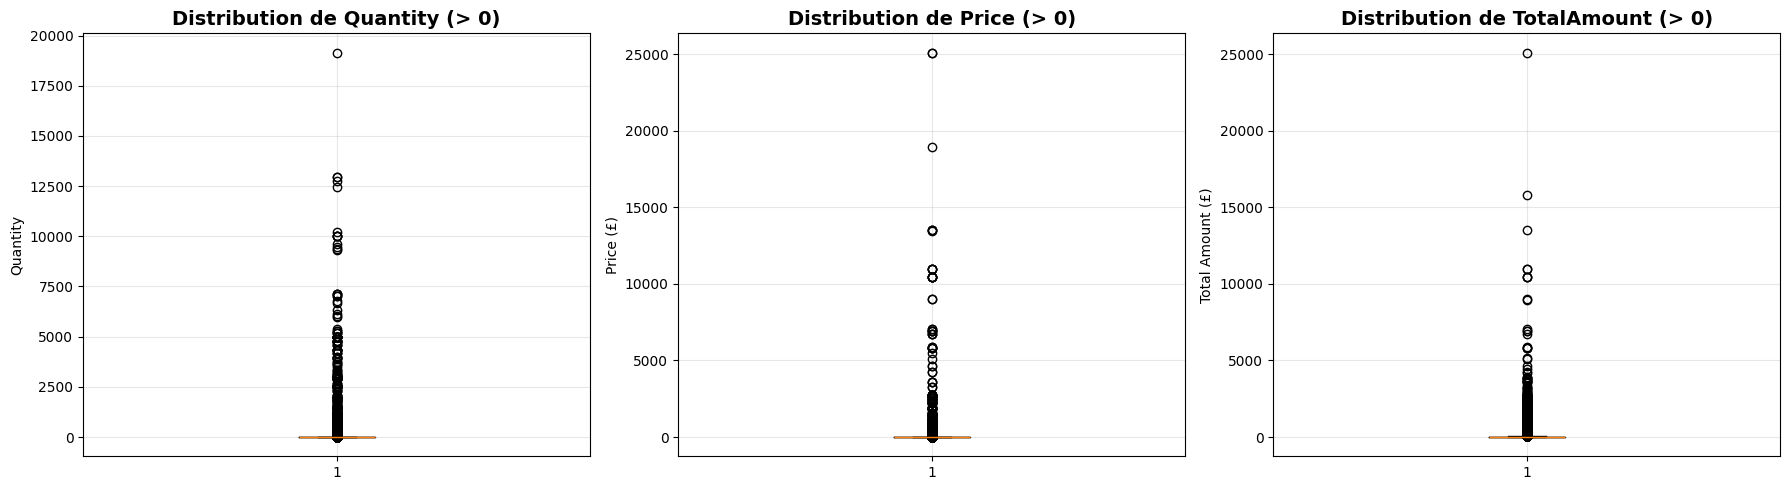


⚠️ VALEURS EXTRÊMES DÉTECTÉES :
Quantity max : 19,152
Price max : 25,111.09 £
TotalAmount max : 25,111.09 £
TotalAmount min : -53,594.36 £


In [12]:
# Visualisation des outliers avec boxplots
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot Quantity (seulement valeurs positives pour mieux voir)
data_positive = data[data['Quantity'] > 0]
axes[0].boxplot(data_positive['Quantity'])
axes[0].set_title('Distribution de Quantity (> 0)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Quantity')
axes[0].grid(True, alpha=0.3)

# Boxplot Price (seulement valeurs positives)
data_positive_price = data[data['Price'] > 0]
axes[1].boxplot(data_positive_price['Price'])
axes[1].set_title('Distribution de Price (> 0)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price (£)')
axes[1].grid(True, alpha=0.3)

# Boxplot TotalAmount (seulement valeurs positives)
data_positive_amount = data[data['TotalAmount'] > 0]
axes[2].boxplot(data_positive_amount['TotalAmount'])
axes[2].set_title('Distribution de TotalAmount (> 0)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Total Amount (£)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️ VALEURS EXTRÊMES DÉTECTÉES :")
print(f"Quantity max : {data['Quantity'].max():,}")
print(f"Price max : {data['Price'].max():,.2f} £")
print(f"TotalAmount max : {data['TotalAmount'].max():,.2f} £")
print(f"TotalAmount min : {data['TotalAmount'].min():,.2f} £")

### 📈 Interprétation des outliers

**Ce que nous cherchons :**
- **Quantity** : Commandes anormalement grandes (> 10 000 unités = probablement grossiste/B2B)
- **Price** : Prix très élevés (> £1000 = produits premium ou erreurs)
- **TotalAmount** : Transactions très importantes (> £10 000 = clients VIP ou B2B)

**Impact sur CLV/RFM :**
- Les outliers peuvent fausser les moyennes → envisager des transformations (log) ou segmentation B2C vs B2B
- Pour le RFM, les montants extrêmes vont automatiquement créer des segments "Champions"
- À décider : conserver ou plafonner ces valeurs selon le contexte métier

## 📋 SYNTHÈSE DE L'ÉTAPE 1

Récapitulatif des actions à effectuer pour le nettoyage avant analyse RFM/CLV.

In [13]:
# Synthèse des problèmes détectés
print("=" * 70)
print("RÉSUMÉ DE L'AUDIT QUALITÉ")
print("=" * 70)

print(f"\n✅ Dataset initial : {len(data):,} lignes")
print(f"\n📊 PROBLÈMES IDENTIFIÉS :")
print(f"   • Customer ID manquants : {data['Customer ID'].isnull().sum():,} ({(data['Customer ID'].isnull().sum()/len(data)*100):.1f}%)")
print(f"   • Description manquante : {data['Description'].isnull().sum():,} ({(data['Description'].isnull().sum()/len(data)*100):.1f}%)")
print(f"   • Doublons complets : {data.duplicated().sum():,}")
print(f"   • Annulations (Invoice 'C') : {data['IsCancel'].sum():,}")
print(f"   • Quantités négatives : {(data['Quantity'] < 0).sum():,}")
print(f"   • Prix nuls : {(data['Price'] == 0).sum():,}")
print(f"   • Prix négatifs : {(data['Price'] < 0).sum():,}")

print(f"\n🎯 ACTIONS RECOMMANDÉES :")
print(f"   1️⃣ Supprimer les lignes sans Customer ID (nécessaire pour CLV/RFM)")
print(f"   2️⃣ Supprimer les doublons complets")
print(f"   3️⃣ Séparer les annulations des transactions normales")
print(f"   4️⃣ Exclure les transactions avec Price ≤ 0 ou Quantity ≤ 0")
print(f"   5️⃣ Convertir Customer ID en format string propre")
print(f"   6️⃣ Analyser les outliers (décision métier sur seuils)")

print("\n⏭️  Prêt à passer à l'étape de nettoyage effectif !")

RÉSUMÉ DE L'AUDIT QUALITÉ

✅ Dataset initial : 525,461 lignes

📊 PROBLÈMES IDENTIFIÉS :
   • Customer ID manquants : 107,927 (20.5%)
   • Description manquante : 2,928 (0.6%)
   • Doublons complets : 6,865
   • Annulations (Invoice 'C') : 10,206
   • Quantités négatives : 12,326
   • Prix nuls : 3,687
   • Prix négatifs : 3

🎯 ACTIONS RECOMMANDÉES :
   1️⃣ Supprimer les lignes sans Customer ID (nécessaire pour CLV/RFM)
   2️⃣ Supprimer les doublons complets
   3️⃣ Séparer les annulations des transactions normales
   4️⃣ Exclure les transactions avec Price ≤ 0 ou Quantity ≤ 0
   5️⃣ Convertir Customer ID en format string propre
   6️⃣ Analyser les outliers (décision métier sur seuils)

⏭️  Prêt à passer à l'étape de nettoyage effectif !
   • Doublons complets : 6,865
   • Annulations (Invoice 'C') : 10,206
   • Quantités négatives : 12,326
   • Prix nuls : 3,687
   • Prix négatifs : 3

🎯 ACTIONS RECOMMANDÉES :
   1️⃣ Supprimer les lignes sans Customer ID (nécessaire pour CLV/RFM)
   2️⃣

---

# ÉTAPE 2 : NETTOYAGE EFFECTIF DES DONNÉES

Application des 6 actions de nettoyage identifiées pour créer un dataset propre exploitable pour les analyses RFM/CLV/Cohortes.

## 2.1 Sauvegarde du dataset original

Créons une copie pour pouvoir revenir en arrière si nécessaire.

In [14]:
# Sauvegarde du dataset original
data_original = data.copy()
print(f"✅ Dataset original sauvegardé : {len(data_original):,} lignes")

✅ Dataset original sauvegardé : 525,461 lignes


## 2.2 Action 1 : Suppression des lignes sans Customer ID

**Justification** : Le Customer ID est indispensable pour :
- Calculer le RFM (Récence, Fréquence, Montant par client)
- Estimer la CLV (Customer Lifetime Value)
- Analyser les cohortes client

Sans ID, impossible d'attribuer une transaction à un client → données inutilisables pour notre objectif.

In [15]:
# Suppression des lignes sans Customer ID
print("=" * 70)
print("ACTION 1 : SUPPRESSION DES LIGNES SANS CUSTOMER ID")
print("=" * 70)

before = len(data)
data = data[data['Customer ID'].notna()].copy()
after = len(data)

print(f"\n✅ Lignes supprimées : {before - after:,} ({((before - after) / before * 100):.2f}%)")
print(f"✅ Lignes conservées : {after:,} ({(after / before * 100):.2f}%)")

ACTION 1 : SUPPRESSION DES LIGNES SANS CUSTOMER ID

✅ Lignes supprimées : 107,927 (20.54%)
✅ Lignes conservées : 417,534 (79.46%)

✅ Lignes supprimées : 107,927 (20.54%)
✅ Lignes conservées : 417,534 (79.46%)


## 2.3 Action 2 : Suppression des doublons complets

Élimination des transactions identiques (même Invoice, StockCode, Quantity, Date, Client, etc.).

In [16]:
# Suppression des doublons
print("=" * 70)
print("ACTION 2 : SUPPRESSION DES DOUBLONS COMPLETS")
print("=" * 70)

before = len(data)
data = data.drop_duplicates().copy()
after = len(data)

print(f"\n✅ Doublons supprimés : {before - after:,}")
print(f"✅ Lignes conservées : {after:,}")

ACTION 2 : SUPPRESSION DES DOUBLONS COMPLETS

✅ Doublons supprimés : 6,771
✅ Lignes conservées : 410,763

✅ Doublons supprimés : 6,771
✅ Lignes conservées : 410,763


## 2.4 Action 3 : Séparation des annulations

Création de deux datasets :
- **data_clean** : transactions normales uniquement (pour analyse RFM/CLV)
- **data_cancels** : annulations (pour analyse séparée si besoin)

**Note** : On exclut les annulations car elles fausseraient le calcul de CLV "brute". Une analyse avancée pourrait les réintégrer pour calculer une CLV nette.

In [17]:
# Séparation annulations vs transactions normales
print("=" * 70)
print("ACTION 3 : SÉPARATION DES ANNULATIONS")
print("=" * 70)

# Dataset des annulations (pour analyse séparée)
data_cancels = data[data['IsCancel']].copy()

# Dataset principal sans annulations
data_clean = data[~data['IsCancel']].copy()

print(f"\n✅ Transactions normales (data_clean) : {len(data_clean):,}")
print(f"✅ Annulations (data_cancels) : {len(data_cancels):,}")
print(f"\nPourcentage d'annulations : {(len(data_cancels) / len(data) * 100):.2f}%")

ACTION 3 : SÉPARATION DES ANNULATIONS

✅ Transactions normales (data_clean) : 400,947
✅ Annulations (data_cancels) : 9,816

Pourcentage d'annulations : 2.39%


## 2.5 Action 4 : Exclusion des transactions invalides

Suppression des lignes avec :
- **Quantity ≤ 0** (quantités négatives ou nulles)
- **Price ≤ 0** (prix négatifs ou nuls)

**Justification** : Ces valeurs invalides fausseraient les calculs de revenus et CLV.

In [18]:
# Exclusion des transactions avec Quantity ou Price invalides
print("=" * 70)
print("ACTION 4 : EXCLUSION DES TRANSACTIONS INVALIDES")
print("=" * 70)

before = len(data_clean)

# Analyse avant suppression
qty_invalid = (data_clean['Quantity'] <= 0).sum()
price_invalid = (data_clean['Price'] <= 0).sum()

print(f"\n📊 Transactions invalides détectées :")
print(f"   • Quantity ≤ 0 : {qty_invalid:,}")
print(f"   • Price ≤ 0 : {price_invalid:,}")

# Filtrage
data_clean = data_clean[(data_clean['Quantity'] > 0) & (data_clean['Price'] > 0)].copy()
after = len(data_clean)

print(f"\n✅ Lignes supprimées : {before - after:,}")
print(f"✅ Lignes conservées : {after:,} ({(after / before * 100):.2f}%)")

ACTION 4 : EXCLUSION DES TRANSACTIONS INVALIDES

📊 Transactions invalides détectées :
   • Quantity ≤ 0 : 0
   • Price ≤ 0 : 31

✅ Lignes supprimées : 31
✅ Lignes conservées : 400,916 (99.99%)

✅ Lignes supprimées : 31
✅ Lignes conservées : 400,916 (99.99%)


## 2.6 Action 5 : Conversion du Customer ID en format propre

Conversion de `Customer ID` :
- De float64 (avec .0) → int → string
- Cela facilite les manipulations et rend les IDs plus lisibles

In [19]:
# Conversion Customer ID en string propre
print("=" * 70)
print("ACTION 5 : CONVERSION CUSTOMER ID EN FORMAT PROPRE")
print("=" * 70)

print(f"\n📊 Type avant : {data_clean['Customer ID'].dtype}")
print(f"Exemple avant : {data_clean['Customer ID'].iloc[0]}")

# Conversion float → int → string
data_clean['Customer ID'] = data_clean['Customer ID'].astype(int).astype(str)

print(f"\n✅ Type après : {data_clean['Customer ID'].dtype}")
print(f"✅ Exemple après : {data_clean['Customer ID'].iloc[0]}")
print(f"\n✅ Nombre de clients uniques : {data_clean['Customer ID'].nunique():,}")

ACTION 5 : CONVERSION CUSTOMER ID EN FORMAT PROPRE

📊 Type avant : float64
Exemple avant : 13085.0

✅ Type après : object
✅ Exemple après : 13085

✅ Type après : object
✅ Exemple après : 13085

✅ Nombre de clients uniques : 4,312

✅ Nombre de clients uniques : 4,312


## 2.7 Action 6 : Recalcul du TotalAmount et reset de l'index

Nettoyage final :
- Recalcul de `TotalAmount` sur les données propres
- Reset de l'index pour éviter des problèmes ultérieurs
- Suppression de la colonne temporaire `IsCancel`

In [20]:
# Nettoyage final
print("=" * 70)
print("ACTION 6 : NETTOYAGE FINAL")
print("=" * 70)

# Recalcul TotalAmount (au cas où il y aurait eu des modifications)
data_clean['TotalAmount'] = data_clean['Quantity'] * data_clean['Price']

# Suppression de la colonne temporaire IsCancel
data_clean = data_clean.drop('IsCancel', axis=1)

# Reset de l'index
data_clean = data_clean.reset_index(drop=True)

print(f"\n✅ Colonne TotalAmount recalculée")
print(f"✅ Colonne IsCancel supprimée")
print(f"✅ Index réinitialisé")
print(f"\n📊 Colonnes finales : {list(data_clean.columns)}")

ACTION 6 : NETTOYAGE FINAL

✅ Colonne TotalAmount recalculée
✅ Colonne IsCancel supprimée
✅ Index réinitialisé

📊 Colonnes finales : ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'TotalAmount']

✅ Colonne TotalAmount recalculée
✅ Colonne IsCancel supprimée
✅ Index réinitialisé

📊 Colonnes finales : ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'TotalAmount']


## 📊 SYNTHÈSE COMPLÈTE DU NETTOYAGE

Bilan du pipeline de nettoyage et statistiques du dataset final.

In [21]:
# Synthèse complète du nettoyage
print("=" * 70)
print("🎯 SYNTHÈSE COMPLÈTE DU NETTOYAGE")
print("=" * 70)

print(f"\n📊 ÉVOLUTION DES DONNÉES :")
print(f"   • Dataset original : {len(data_original):,} lignes")
print(f"   • Dataset nettoyé (data_clean) : {len(data_clean):,} lignes")
print(f"   • Lignes supprimées : {len(data_original) - len(data_clean):,} ({((len(data_original) - len(data_clean)) / len(data_original) * 100):.2f}%)")
print(f"   • Taux de rétention : {(len(data_clean) / len(data_original) * 100):.2f}%")

print(f"\n👥 CLIENTS :")
print(f"   • Nombre de clients uniques : {data_clean['Customer ID'].nunique():,}")
print(f"   • Nombre moyen de transactions par client : {(len(data_clean) / data_clean['Customer ID'].nunique()):.2f}")

print(f"\n🌍 GÉOGRAPHIE :")
print(f"   • Nombre de pays : {data_clean['Country'].nunique()}")

print(f"\n📦 PRODUITS :")
print(f"   • Nombre de produits uniques : {data_clean['StockCode'].nunique():,}")

print(f"\n💰 STATISTIQUES FINANCIÈRES :")
print(f"   • Revenu total : £{data_clean['TotalAmount'].sum():,.2f}")
print(f"   • Panier moyen : £{data_clean['TotalAmount'].mean():.2f}")
print(f"   • Panier médian : £{data_clean['TotalAmount'].median():.2f}")

print(f"\n📅 PÉRIODE :")
print(f"   • Début : {data_clean['InvoiceDate'].min()}")
print(f"   • Fin : {data_clean['InvoiceDate'].max()}")
print(f"   • Durée : {(data_clean['InvoiceDate'].max() - data_clean['InvoiceDate'].min()).days} jours")

print(f"\n✅ Dataset 'data_clean' prêt pour les analyses RFM, CLV et Cohortes !")

🎯 SYNTHÈSE COMPLÈTE DU NETTOYAGE

📊 ÉVOLUTION DES DONNÉES :
   • Dataset original : 525,461 lignes
   • Dataset nettoyé (data_clean) : 400,916 lignes
   • Lignes supprimées : 124,545 (23.70%)
   • Taux de rétention : 76.30%

👥 CLIENTS :
   • Nombre de clients uniques : 4,312
   • Nombre moyen de transactions par client : 92.98

🌍 GÉOGRAPHIE :
   • Nombre de pays : 37

📦 PRODUITS :
   • Nombre de produits uniques : 4,017

💰 STATISTIQUES FINANCIÈRES :
   • Revenu total : £8,798,233.74
   • Panier moyen : £21.95
   • Panier médian : £12.50

📅 PÉRIODE :
   • Début : 2009-12-01 07:45:00
   • Fin : 2010-12-09 20:01:00
   • Durée : 373 jours

✅ Dataset 'data_clean' prêt pour les analyses RFM, CLV et Cohortes !


In [22]:
# Vérification finale : aucune valeur manquante ou invalide
print("\n" + "=" * 70)
print("🔍 VÉRIFICATION FINALE DE LA QUALITÉ")
print("=" * 70)

print(f"\n✅ Valeurs manquantes par colonne :")
missing_final = data_clean.isnull().sum()
if missing_final.sum() == 0:
    print("   → Aucune valeur manquante ! 🎉")
else:
    print(missing_final[missing_final > 0])

print(f"\n✅ Valeurs invalides :")
print(f"   • Quantity ≤ 0 : {(data_clean['Quantity'] <= 0).sum()} (attendu: 0)")
print(f"   • Price ≤ 0 : {(data_clean['Price'] <= 0).sum()} (attendu: 0)")
print(f"   • TotalAmount ≤ 0 : {(data_clean['TotalAmount'] <= 0).sum()} (attendu: 0)")

print(f"\n✅ Aperçu du dataset nettoyé :")
data_clean.head()


🔍 VÉRIFICATION FINALE DE LA QUALITÉ

✅ Valeurs manquantes par colonne :
   → Aucune valeur manquante ! 🎉

✅ Valeurs invalides :
   • Quantity ≤ 0 : 0 (attendu: 0)
   • Price ≤ 0 : 0 (attendu: 0)
   • TotalAmount ≤ 0 : 0 (attendu: 0)

✅ Aperçu du dataset nettoyé :
   → Aucune valeur manquante ! 🎉

✅ Valeurs invalides :
   • Quantity ≤ 0 : 0 (attendu: 0)
   • Price ≤ 0 : 0 (attendu: 0)
   • TotalAmount ≤ 0 : 0 (attendu: 0)

✅ Aperçu du dataset nettoyé :


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [23]:
data_clean.to_csv('data_clean.csv', index=False)
